In [ ]:
pip install rocketpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.5/129.5 KB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 KB 715.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 KB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 11.6 MB/s eta 0:00:00
  Created wheel for simplekml: filename=simplekml-1.3.6-py3-none-any.whl size=65875 sha256=4411a3227786a2fad0475df6f6bc49075944320fa2d553edb3e25fb341e92a8b
  Stored in directory: /root/.cache/pip/wheels/61/7c/b1/a15afd1959498020ff45abc6e309b5c48975a5d741e60c5922
Successfully built simplekml
  Attempting uninstall: netCDF4
    Found existing installation: netCDF4 1.6.2
    Uninstalling netCDF4-1.6.2:
      Successfully uninstalled netCDF4-1.6.2


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from rocketpy import Environment,Rocket,SolidMotor,Flight
from scipy.integrate import simpson
from mpl_toolkits import mplot3d
import math
import csv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
## Define the rocket
# Prepare Motor
L1520T = SolidMotor(
    thrustSource="AeroTech_L1520T.eng",
    burnOut=2.4,
    grainNumber=3,
    grainSeparation= 0.0016,
    grainDensity= 1625,
    grainOuterRadius= 0.031661,
    grainInitialInnerRadius= 0.011112,
    grainInitialHeight= 0.1318,
    nozzleRadius= 0.023813,
    throatRadius= 0.0086995,
    interpolationMethod="linear",
)

# Prepare Rocket
L1520T = SolidMotor(
    thrustSource="AeroTech_L1520T.eng",
    burnOut=2.4,
    grainNumber=3,
    grainSeparation= 0.0016,
    grainDensity= 1625,
    grainOuterRadius= 0.031661,
    grainInitialInnerRadius= 0.011112,
    grainInitialHeight= 0.1318,
    nozzleRadius= 0.023813,
    throatRadius= 0.0086995,
    interpolationMethod="linear",
)

# Prepare Rocket
FullScale = Rocket(
    motor=L1520T,
    radius=0.07835,
    mass= 16.27,
    inertiaI=9.618,
    inertiaZ=0.04,
    distanceRocketNozzle=-1.277,
    distanceRocketPropellant=-0.759,
    powerOffDrag="OR_power_off_validated.csv", #Help figuring out how to remake these
    powerOnDrag="OR_power_on_validated.csv",
)

NoseCone = FullScale.addNose(length=.782, kind="ogive", distanceToCM=0.61)

FinSet = FullScale.addTrapezoidalFins(
    n=4,
    rootChord=0.25,
    tipChord=0.157,
    span=0.15,
    distanceToCM=-0.871,
    cantAngle=0,
    radius=None,
    airfoil=None,
)

Tail = FullScale.addTail(
    topRadius=0.0635, bottomRadius=0.0435, length=0.060, distanceToCM=-1.194656
)

Streaming output truncated to the last 5000 lines.
button:-0.6999999999999997
0.14282549687450774
wind:0.6000000000000001
button:-0.7499999999999998
0.14282549687450774
wind:0.6000000000000001
button:-0.7999999999999998
0.14282549687450774
wind:0.6000000000000001
button:-0.8499999999999999
0.14282549687450774
wind:0.6000000000000001
button:-0.8999999999999999
0.14282549687450774
wind:0.6000000000000001
button:-0.95
0.14282549687450774
wind:0.6000000000000001
button:-1.0
0.14282549687450774
wind:0.7000000000000001
button:-0.049999999999999156
0.14340604992431147
wind:0.7000000000000001
button:-0.0999999999999992
0.14341754063120207
wind:0.7000000000000001
button:-0.14999999999999925
0.1431168091259764
wind:0.7000000000000001
button:-0.1999999999999993
0.14294091036714174
wind:0.7000000000000001
button:-0.24999999999999933
0.14291198274611516
wind:0.7000000000000001
button:-0.2999999999999994
0.14293332168588738
wind:0.7000000000000001
button:-0.3499999999999994
0.14293332168588738
wind:

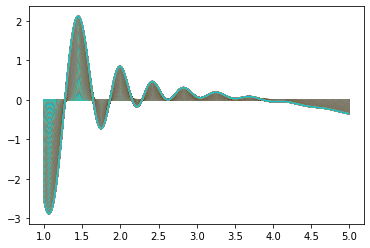

In [ ]:
## modify lower button position since amplitude of motion was determines to be least when one button is
## at the CG
lower_buttons_list = list((np.arange(-1,0,.05)))
lower_buttons_list.reverse()
winds_list = list((np.arange(0,9,.1)))

damping_result_plot = []
lower_rail_button_plot = []
wind_plot = []
integral = []

Env = Environment(railLength=3.66, latitude=35.176307, longitude=-76.826296, elevation=10)
for wind in winds_list:
    for lower_button in lower_buttons_list:

        Env.setAtmosphericModel(type="CustomAtmosphere", wind_v=wind)

        FullScale.setRailButtons([lower_button, -.275])


        try:
            # Simulate first 5 seconds of Flight
            TestFlight = Flight(
                rocket=FullScale,
                environment=Env,
                inclination=90,
                heading=0,
                maxTimeStep=0.01,
                maxTime=5,
            )
            TestFlight.postProcess()
            #TestFlight.allInfo()

            # Perform a Fourier Analysis
            Fs = 100.0
            # sampling rate
            Ts = 1.0 / Fs
            # sampling interval
            t = np.arange(1, 5, Ts)  # time vector
            ff = 5
            # frequency of the signal
            y = TestFlight.attitudeAngle(t) - np.mean(TestFlight.attitudeAngle(t))
            
            y_int = simpson(abs(y),dx=0.01)

            coef = np.polyfit(t,y,1)
            y_new = np.polyval(coef,t)
            plt.plot(t,y-y_new)

            der = np.gradient(y,t)

            sign = []
            inflection_points = []
            inflection_counter = 0
            if der[0] > 0:
                sign.append(True) # positive
            else:
                sign.append(False) #negative

            inflection_point = []
            for i in range(1,len(der)):
                if der[i] > 0:
                    sign.append(True) # positive
                else:
                    sign.append(False)  #negative
                
                if (sign[i] == False and sign[i-1] == True) or (sign[i] == True and sign[i-1] == False):
                    inflection_point.append(t[i])
                    inflection_counter += 1

            #for i, inflection_p in enumerate(inflection_point, 1):
                #plt.axvline(x=inflection_p, color='k', label=f'Inflection Point {i}')

            coef = np.polyfit(t,y,1)
            fy = np.polyval(coef,t)

            # determine amplitude
            amplitudes = []
            for inflection_po in inflection_point:
                #print(inflection_po*100)
                curve = y[int((inflection_po*100)-100)]
                amplitudes.append(curve-np.polyval(coef,inflection_po))
            #print(inflection_point)
            #plt.plot(inflection_point[1],amplitudes[1],marker='o')
            #plt.plot(inflection_point[3],amplitudes[3],marker='o')
            #plt.show()
            delta = np.log(amplitudes[1]/amplitudes[3])
            damping_ratio = 1 / math.sqrt(1 + (2*math.pi / delta)**2)

            damping_result_plot.append(damping_ratio)
            lower_rail_button_plot.append(lower_button)
            wind_plot.append(wind)
            integral.append(y_int)
            print(f'wind:{wind}')
            print(f'button:{lower_button}')
            print(damping_ratio)
        except:
            continue

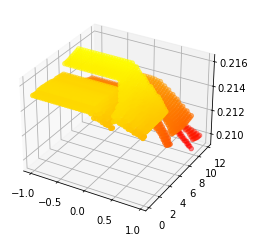

In [ ]:
ax = plt.axes(projection='3d')
ax.scatter3D(lower_rail_button_plot, wind_plot, damping_result_plot, c=damping_result_plot, cmap='autumn')
#plt.plot(damping_stores)
plt.show()

data = [lower_rail_button_plot, wind_plot, damping_result_plot]
with open('VariableWindDamping.csv', 'w', newline='') as file:
    writer = csv.writer(file)

    # Write the list of lists to the CSV file
    writer.writerows(data)

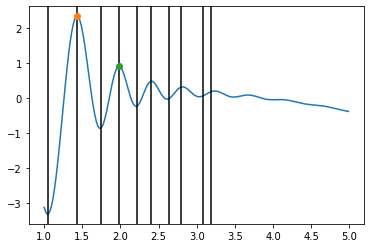

wind:10
button:0.5
0.14835878376205125


In [ ]:
# Testing Script

## modify lower button position since amplitude of motion was determines to be least when one button is
## at the CG
lower_buttons_list = [0.5]
winds_list = [10]

damping_result_plot = []
lower_rail_button_plot = []
wind_plot = []

Env = Environment(railLength=3.66, latitude=35.176307, longitude=-76.826296, elevation=10)
for wind in winds_list:
    for lower_button in lower_buttons_list:

        Env.setAtmosphericModel(type="CustomAtmosphere", wind_v=wind)

        FullScale.setRailButtons([0, 1])


        try: # Sometimes I get a divide by zero error for some reason
            # Simulate first 5 seconds of Flight
            TestFlight = Flight(
                rocket=FullScale,
                environment=Env,
                inclination=90,
                heading=0,
                maxTimeStep=0.01,
                maxTime=5,
            )
            TestFlight.postProcess()
            #TestFlight.allInfo()

            # Perform a Fourier Analysis
            Fs = 100.0
            # sampling rate
            Ts = 1.0 / Fs
            # sampling interval
            t = np.arange(1, 5, Ts)  # time vector
            ff = 5
            # frequency of the signal
            y = TestFlight.attitudeAngle(t) - np.mean(TestFlight.attitudeAngle(t))
            coef = np.polyfit(t,y,1)
            y_new = np.polyval(coef,t)
            plt.plot(t,y-y_new)

            der = np.gradient(y,t)

            sign = []
            inflection_points = []
            inflection_counter = 0
            if der[0] > 0:
                sign.append(True) # positive
            else:
                sign.append(False) #negative

            inflection_point = []
            for i in range(1,len(der)):
                if der[i] > 0:
                    sign.append(True) # positive
                else:
                    sign.append(False)  #negative
                
                if (sign[i] == False and sign[i-1] == True) or (sign[i] == True and sign[i-1] == False):
                    inflection_point.append(t[i])
                    inflection_counter += 1

            for i, inflection_p in enumerate(inflection_point, 1):
                plt.axvline(x=inflection_p, color='k', label=f'Inflection Point {i}')

            coef = np.polyfit(t,y,1)
            fy = np.polyval(coef,t)

            # determine amplitude
            amplitudes = []
            for inflection_po in inflection_point:
                #print(inflection_po*100)
                curve = y[int((inflection_po*100)-100)]
                amplitudes.append(curve-np.polyval(coef,inflection_po))
            #print(inflection_point)
            plt.plot(inflection_point[1],amplitudes[1],marker='o')
            plt.plot(inflection_point[3],amplitudes[3],marker='o')
            plt.show()
            delta = np.log(amplitudes[1]/amplitudes[3])
            damping_ratio = 1 / math.sqrt(1 + (2*math.pi / delta)**2)

            damping_result_plot.append(damping_ratio)
            lower_rail_button_plot.append(lower_button)
            wind_plot.append(wind)
            print(f'wind:{wind}')
            print(f'button:{lower_button}')
            print(damping_ratio)
        except:
            continue